In [1]:
import pickle
import matplotlib.pyplot as plt
import best

In [2]:
study = [101, 100, 102, 104, 102, 97, 105, 105, 98, 101, 100, 123, 105, 103, 100, 95, 102, 106,
         109, 102, 82, 102, 100, 102, 102, 101, 102, 102, 103, 103, 97, 97, 103, 101, 97, 104,
         96, 103, 124, 101, 101, 100, 101, 101, 104, 100, 101]
control = [99, 101, 100, 101, 102, 100, 97, 101, 104, 101, 102, 102, 100, 105, 88, 101, 100,
           104, 100, 100, 100, 101, 102, 103, 97, 101, 101, 100, 101, 99, 101, 100, 100,
           101, 100, 99, 101, 100, 102, 99, 100, 99]

The below cell only tries to load the results of the analysis from `results.bin`, if it exists:

In [3]:
filename = "results.bin"

try:
    with open(filename, "rb") as f:
        best_out = pickle.load(f)
        print('Previous analysis loaded from "%s"' % filename)
        
except (FileNotFoundError, EOFError, pickle.UnpicklingError):
    print("Performing Bayesian analysis")
    best_out = best.analyze_two(study, control)

    print('Saving results into "%s"' % filename)
    with open(filename, "wb") as f:
        pickle.dump(best_out, f)

Performing Bayesian analysis


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Group 2 log sigma, Group 1 log sigma, nu - 2.5, Group 2 mean, Group 1 mean]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:08<00:00, 686.60draws/s]


Saving results into "results.bin"


The same effect could be achieved with the `shelve` package instead of `pickle`:

```python
import shelve

with shelve.open('results') as stored_data:
    if 'best_out' not in stored_data:
        stored_data['best_out'] = best.analyze_two(study, control)
    best_out = stored_data['best_out']
```

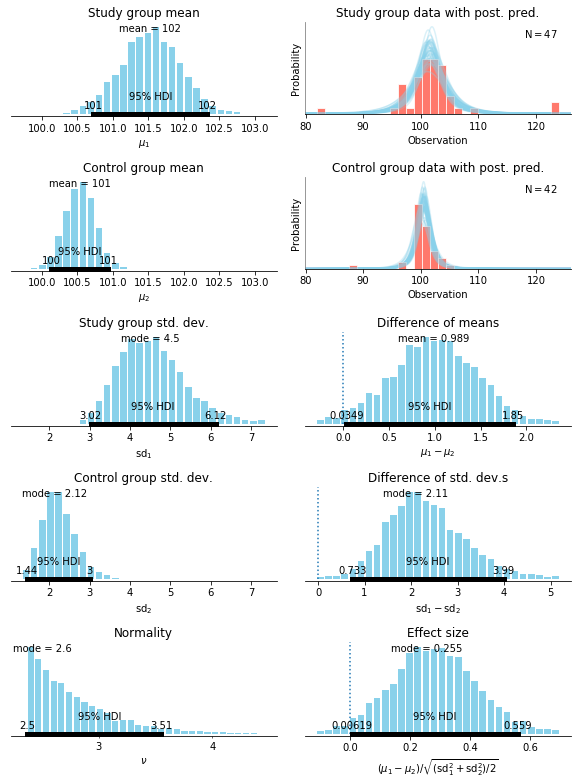

In [5]:
best.plot_all(best_out, group1_name='Study group', group2_name='Control group')
plt.savefig('smart_drug.pdf')
plt.show()

In [6]:
best_out.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Group 1 mean,101.526657,0.420825,0.005459,100.689393,102.333162,5497.095489,0.999793
Group 2 mean,100.542988,0.213679,0.002925,100.109467,100.931487,5159.162267,0.999933
nu - 2.5,0.338543,0.356814,0.005207,0.000031,1.050956,3813.281908,1.000465
Normality,2.838543,0.356814,0.005207,2.500031,3.550956,3813.281908,1.000465
Group 1 log sigma,0.861756,0.164994,0.002461,0.554809,1.206847,4645.855587,1.000871
Group 2 log sigma,0.147917,0.166302,0.002210,-0.167409,0.476736,4652.284872,0.999763
Group 1 sigma,2.400099,0.405667,0.006064,1.665481,3.230938,4410.522284,1.000874
Group 2 sigma,1.175694,0.199466,0.002730,0.809560,1.566471,4458.149513,0.999760
Group 1 SD,4.563051,0.835348,0.011584,3.062953,6.246218,5106.319939,0.999850
Group 2 SD,2.235997,0.415180,0.006714,1.472846,3.058489,3989.422055,1.000135


In [7]:
print(best_out.model)

μ1 ~ Normal(101.18, 4718.03)
μ2 ~ Normal(101.18, 4718.03)
log(σ1) ~ Uniform(log(0.00471803), log(4718.03))
log(σ2) ~ Uniform(log(0.00471803), log(4718.03))
ν ~ Exponential(1/27.5) + 2.5
y1 ~ t(ν, μ1, σ1)
y2 ~ t(ν, μ2, σ2)



In [8]:
print('Probability that the drug increases IQ by at least 1: %d%%' %
         (best_out.posterior_prob('Difference of means', low=1.0) * 100))

Probability that the drug increases IQ by at least 1: 48%
